In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mzn_bench as mb

import os

In [47]:
root = os.path.dirname(os.path.abspath("__file__"))
data = pd.read_csv(os.path.join(root, 'statistics.csv'))

In [ ]:
# Split the 'configuration' column by '_' and expand the results into separate columns
df = data
is_median = df['configuration'].str.contains('Median')
df = df.join(df[is_median]['configuration'].str.extract(r'(?P<case>[^_]+)_(?P<solver>[^_]+)_(?P<type>[^_]+)', expand=True))
is_mindis = data['data_file'].str.contains('mindis')
df.loc[is_mindis, ['solver', 'type']] = df.loc[is_mindis, 'configuration'].str.extract(r'(?P<solver>[^_]+)_(?P<type>[^_]+)', expand=True)
df.loc[is_mindis, 'case'] = df.loc[is_mindis, 'data_file'].str.extract(r'/(?P<case>\w+?)_')
is_maxeff = data['data_file'].str.contains('maxeff')
df.loc[is_maxeff, ['solver', 'type']] = df.loc[is_maxeff, 'configuration'].str.extract(r'(?P<solver>[^_]+)_(?P<type>[^_]+)', expand=True)
df.loc[is_maxeff, 'case'] = df.loc[is_maxeff, 'data_file'].str.extract(r'/(?P<case>\w+?)_')
df['case'] = df['case'].str.lower()
df['solver'] = df['solver'].str.lower()
df['type'] = df['type'].str.lower()
df['data_file'] = df['data_file'].str.replace('dzn/', '')
data = df

In [ ]:
is_blackbox = data['type'] == 'bb'
is_decomp = data['type'] == 'decomp'
is_mindis = data['case'] == 'mindis'
is_median = data['case'] == 'median'
is_maxeff = data['case'] == 'maxeff'

,configuration,problem,model,data_file,status,time,flatBoolVars,flatIntConstraints,initTime,eliminatedImplications,...,flatIntVars,failures,nSolutions,nodes,propagators,solveTime,flatTime,case,solver,type
0,Gecode_BB,.,jobshop_gini.mzn,new_dzn/maxeff_ta45_2a_alloc3.dzn,OPTIMAL_SOLUTION,9.074661,19908.0,23575.0,0.277554,1260.0,...,2466.0,4422.0,78.0,29278.0,32874.0,6.68196,1.665320,maxeff,gecode,bb
3,Gecode_BB,.,jobshop_gini.mzn,new_dzn/maxeff_ta51_4a_alloc1.dzn,OPTIMAL_SOLUTION,35.793432,39956.0,44565.0,0.573138,1600.0,...,3108.0,10767.0,159.0,70013.0,63689.0,31.01060,3.383570,maxeff,gecode,bb
5,Gecode_BB,.,jobshop_gini.mzn,new_dzn/maxeff_ta68_5a_alloc3.dzn,OPTIMAL_SOLUTION,332.996646,53217.0,59327.0,0.813895,2100.0,...,4109.0,113068.0,186.0,300664.0,84826.0,325.94700,4.892410,maxeff,gecode,bb
6,Gecode_BB,.,jobshop_gini.mzn,new_dzn/maxeff_ta79_7a_alloc1.dzn,SATISFIED,605.580071,206560.0,218772.0,NaN,4200.0,...,8211.0,NaN,227.0,NaN,NaN,NaN,16.063400,maxeff,gecode,bb
7,Median_Gecode_BB,.,jobshop_gini.mzn,dzn/ta49_2a_alloc2.dzn,SATISFIED,600.779777,19906.0,23573.0,0.268948,1260.0,...,2467.0,663374.0,37.0,1333235.0,32872.0,598.15400,1.845390,median,gecode,bb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2714,Median_Gecode_BB,.,jobshop_gini.mzn,dzn/ta77_5a_alloc2.dzn,SATISFIED,605.570831,206582.0,218792.0,NaN,4200.0,...,8210.0,NaN,12.0,NaN,NaN,NaN,15.700400,median,gecode,bb
2717,Gecode_BB,.,jobshop_gini.mzn,new_dzn/maxeff_ta74_9a_alloc2.dzn,SATISFIED,605.689783,206560.0,218774.0,NaN,4200.0,...,8213.0,NaN,172.0,NaN,NaN,NaN,16.053899,maxeff,gecode,bb
2718,Gecode_BB,.,jobshop_gini.mzn,new_dzn/mindis_ta43_3a_alloc1.dzn,OPTIMAL_SOLUTION,179.603246,19907.0,23574.0,0.273973,1260.0,...,2466.0,190970.0,17.0,384327.0,32873.0,176.86500,1.922520,mindis,gecode,bb
2722,Median_Gecode_BB,.,jobshop_gini.mzn,dzn/ta72_8a_alloc1.dzn,SATISFIED,605.731404,206561.0,218774.0,NaN,4200.0,...,8213.0,NaN,7.0,NaN,NaN,NaN,15.664100,median,gecode,bb


In [52]:
def plot_blackbox_vs_decomp_scatter(bb_objective_scores: pd.DataFrame, decomp_objective_scores: pd.DataFrame, title: str):
    plt.figure(figsize=(10,6))
    x_min = min(bb_objective_scores.min(), decomp_objective_scores.min())
    x_max = max(bb_objective_scores.max(), decomp_objective_scores.max())
    x_vals = np.linspace(x_min, x_max, 100)
    plt.fill_between(x_vals, x_vals, [x_max]*len(x_vals), color='orange', alpha=0.2, label='BlackBox Dominant')
    plt.fill_between(x_vals, [x_min]*len(x_vals), x_vals, color='blue', alpha=0.2, label='Decomp Dominant')
    plt.plot(x_vals, x_vals, color='red', linestyle='--', label='Separation Line')
    plt.scatter(bb_objective_scores, decomp_objective_scores, color='green', marker='o', label='BlackBox vs Decomp')
    plt.ylabel('Blackbox Objective')
    plt.xlabel('Decomp Objective')
    plt.title(title)
    plt.legend()
    plt.show()

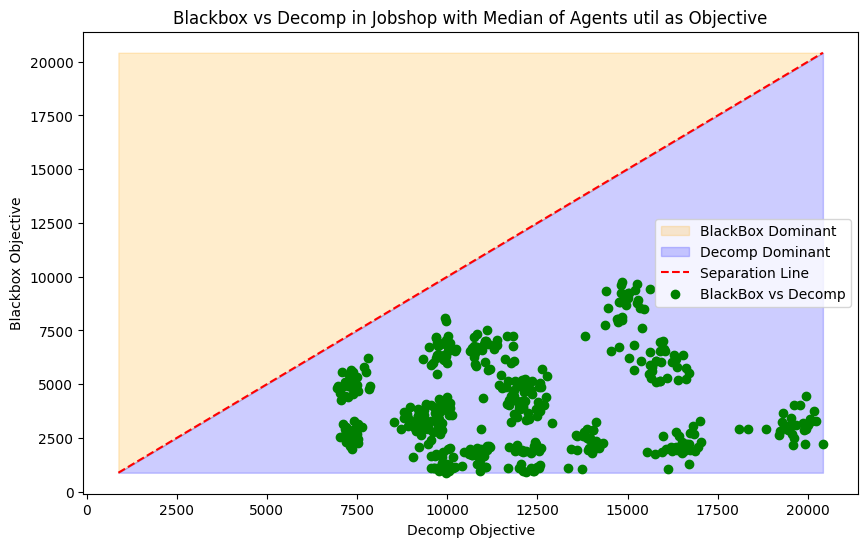

In [54]:
r = data[is_median][['data_file', 'objective', 'type']].copy()
r['objective'] = r['objective'].fillna(value=-1).astype(int)
r['objective'] = -r['objective']
blackbox_data = r[r['type'] == 'bb']
decomp_data = r[r['type'] == 'decomp']
median = pd.merge(left=blackbox_data, right=decomp_data, suffixes=('_bb', '_decomp'), on='data_file')
temp = median['objective_bb']
median['objective_bb'] = median['objective_decomp']
median['objective_decomp'] = temp
plot_blackbox_vs_decomp_scatter(median['objective_bb'], median['objective_decomp'], 'Blackbox vs Decomp in Jobshop with Median of Agents util as Objective')

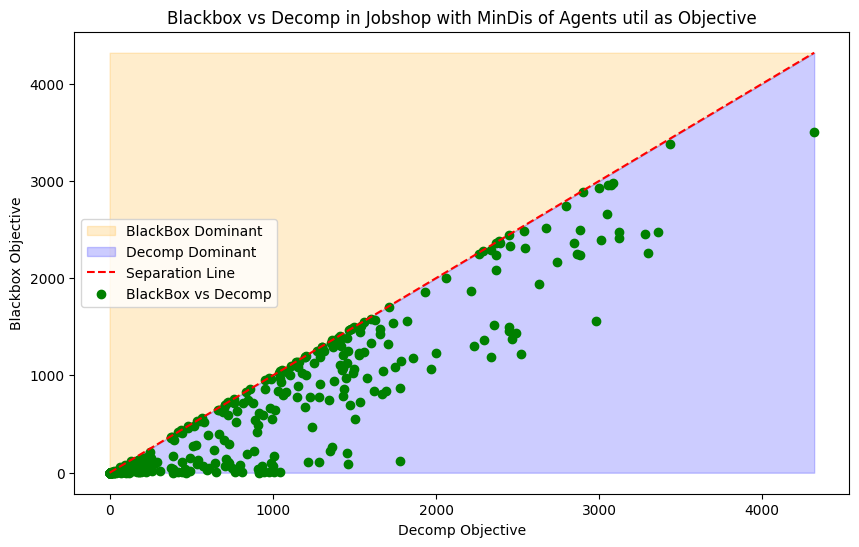

In [ ]:
r = data[is_mindis][['data_file', 'objective', 'type']].copy()
r['objective'] = r['objective'].fillna(value=-1).astype(int)
blackbox_data = r[r['type'] == 'bb']
decomp_data = r[r['type'] == 'decomp']
mindis = pd.merge(left=blackbox_data, right=decomp_data, suffixes=('_bb', '_decomp'), on='data_file')
plot_blackbox_vs_decomp_scatter(mindis['objective_bb'], mindis['objective_decomp'], 'Blackbox vs Decomp in Jobshop with MinDis of Agents util as Objective')

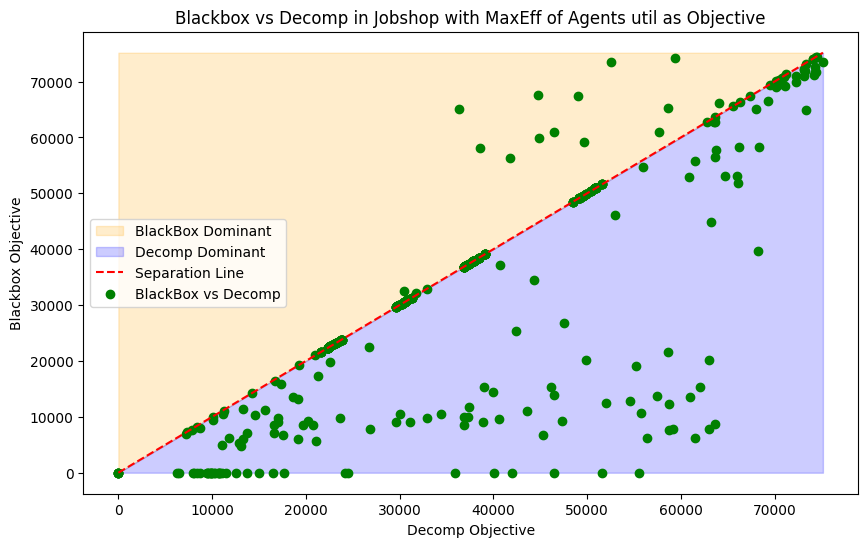

In [51]:
r = data[is_maxeff][['data_file', 'objective', 'type']].copy()
r['objective'] = -r['objective'].fillna(value=1).astype(int)
blackbox_data = r[r['type'] == 'bb']
decomp_data = r[r['type'] == 'decomp']
maxeff = pd.merge(left=blackbox_data, right=decomp_data, suffixes=('_bb', '_decomp'), on='data_file')
# Swap the objective columns due to incorrect display of the reverse negative values
temp = maxeff['objective_bb'].copy()
maxeff['objective_bb'] = maxeff['objective_decomp']
maxeff['objective_decomp'] = temp
plot_blackbox_vs_decomp_scatter(maxeff['objective_bb'], maxeff['objective_decomp'], 'Blackbox vs Decomp in Jobshop with MaxEff of Agents util as Objective')